In [1]:
# hidden
import environment as env
env.initialize()

### Lectura de las series temporales de los agentes climáticos marítimos y atmosféricos

Este ejemplo presenta la lectura de una serie temporal de variables marítimas y atmosféricas y un análisis de la calidad de los datos. En este caso se realiza la lectura de las variables de oleaje del punto SIMAR 1052046 proporcionado por Puertos del Estado.

Las funciones que se utilizan son:

- entrada_datos.lectura.lectura_simar
- lectura.plot_series_temporales
- entrada_datos.pretratamiento.analisis_calidad_series
- entrada_datos.pretratamiento.establecer_cadencia_series

Asimismo, se proporcionan herramientas generales de visualización de los datos de entrada como rosa de oleaje, rosa de viento, funciones de densidad y distribución, espectros de energía, gráficos de dispersión, correlación, etc.
La funciones de visualización se incluyen en:

- clima_maritimo.graficas.plot_analisis

In [2]:
# imports Anaconda
from __future__ import division
import os

# imports ROM 1.1
from entrada_datos import lectura, pretratamiento
from clima_maritimo.graficas import plot_analisis

cadiz_simar = 'SIMAR_1052046'
dir_input = os.path.join(env.input_path, 'clima')
dir_data = os.path.join(env.data_path, 'clima')

La función $lectura\_simar$ permite la obtención de cada una de las siguientes variables:

- Altura de ola significante  $H_s$
- Periodo pico de oleaje $T_p$
- Dirección media de procedencia del olejae $\theta$
- Velocidad media de viento $V_w$
- Dirección media de procedencia $\theta_w$

Es posible representar las series temporales con la funcion $plot\_series\_temporales$.

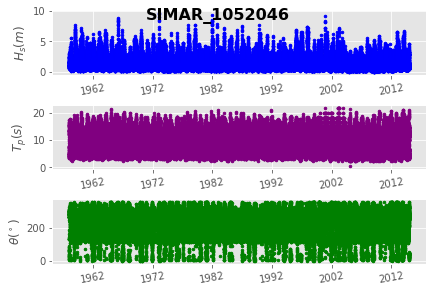

In [3]:
cadiz_hs_sim, cadiz_tp_sim, cadiz_dh_sim, cadiz_vv_sim, cadiz_dv_sim = lectura.lectura_simar(dir_input, cadiz_simar)

df_oleaje = cadiz_hs_sim.join([cadiz_tp_sim, cadiz_dh_sim])
lectura.plot_series_temporales(df_oleaje, cadiz_simar)

Es posible obtener un análisis de la calidad de los datos utilizando la función $analisis\_calidad\_series$. Esta información se guarda en un archivo de texto. 

In [4]:
inf_cadiz = open(os.path.join(dir_data, 'informe_cadiz.txt'), 'w')
cadiz_hs_sim = pretratamiento.analisis_calidad_series(cadiz_hs_sim, inf_cadiz, cadiz_simar + '- hs')

La serie temporal tiene una longitud de 56.0 años y 359.0 días
La serie temporal tiene las siguientes cadencias:
157584 datos con una cadencia de 0 days 03:00:00
26422 datos con una cadencia de 0 days 01:00:00

La serie temporal tiene un total de 0.0 años y 340.0 días sin datos (huecos) correspondiente a un 1.64% de la serie
La duración máxima de huecos para la variable es de:
30 days 18:00:00



Si la serie temporal presenta varias cadencias a lo largo de su longitud, es posible establecer la misma cadencia $cad\_sim$ la cual debe ser elegida por el usuario. La variable $nd\_max\_interp$ define el número de datos máximos que se permite interpolar de huecos. En este caso, se elige la cadencia de 3 horas dado que es la presente en la mayor parte de datos de la serie y se define $nd\_max\_interp=5$

In [5]:
cad_sim  = 3*3600
nd_max_interp = 5

cadiz_hs_sim = pretratamiento.establecer_cadencia_series(cadiz_hs_sim, cad_sim, nd_max_interp, inf_cadiz)

Se ha interpolado a la cadencia de 0 days 03:00:00


Se guarda a archivo la serie obtenida:

In [6]:
cadiz_hs_sim.to_pickle(os.path.join(dir_data, 'cadiz_hs_simc.pkl'))
inf_cadiz.close()

A continuación se presentan algunos ejemplos de las herramientas de visualización de datos presentes en el módulo $clima\_maritimo.graficas.plot\_analisis$

##### Rosa de oleaje y viento: 

/Users/andrealira/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:804: RuntimeWarning: invalid value encountered in greater_equal
  not_smaller_than_edge = (sample[:, i] >= edges[i][-1])


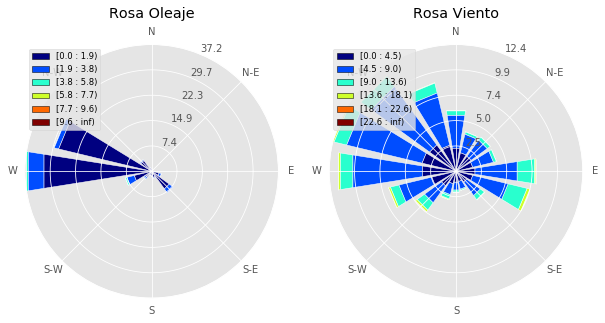

In [7]:
df_sim = df_oleaje.join([cadiz_vv_sim, cadiz_dv_sim])
plot_analisis.rosa_oleaje_viento(df_sim)

##### Gráficos de dispersión:

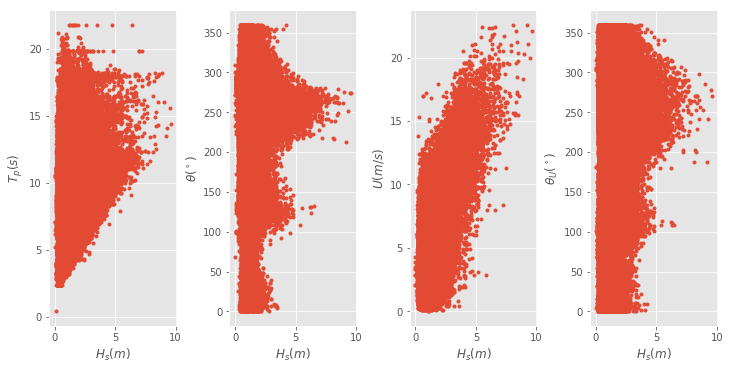

In [8]:
 plot_analisis.dispersion(df_sim, 'hs')

En el caso que existan muchos huecos de datos en la serie temporal, se proporcionan las herramientas para el relleno de los huecos mediante el método de los análogos. Esto se realiza en el apartado [Pretratamiento de las series temporales de los agentes climáticos marítimos y atmosféricos](cl_lectura_pretratamiento_02.ipynb).